In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from pandas import Series, DataFrame
pd.options.display.float_format="{:.5f}".format

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
user_path = "/data/user_spec.csv"
user_df = pd.read_csv(user_path)

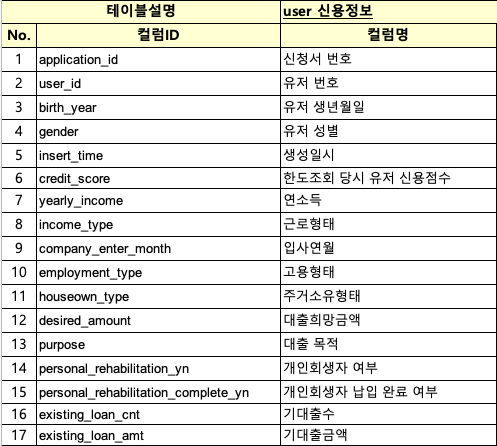

In [ ]:
# 처음 5개 행 추출
user_df.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [ ]:
# 테이블 형태
user_df.shape

(1394216, 17)

In [ ]:
# 테이블 정보
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [ ]:
# column별 null값의 개수
user_df.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [ ]:
# 테이블 통계량 요약
user_df.describe()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
count,1.394216e+06,1.394216e+06,1.381255e+06,1.381255e+06,1.289101e+06,1.394126e+06,1.222456e+06,1.394131e+06,806755.000000,190862.000000,1.195660e+06,1.080442e+06
mean,1.084044e+06,4.395663e+05,1.983285e+03,6.764290e-01,6.384447e+02,4.345326e+07,5.121685e+06,3.040726e+07,0.015753,0.007084,4.743685e+00,7.074593e+07
std,6.259020e+05,2.538436e+05,1.067367e+01,4.678386e-01,1.249724e+02,1.208401e+08,8.608381e+06,1.851687e+08,0.124519,0.083866,4.327669e+00,9.050560e+07
min,1.000000e+00,1.000000e+00,1.927000e+03,0.000000e+00,6.000000e+01,0.000000e+00,1.911090e+05,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00
25%,5.417125e+05,2.203430e+05,1.976000e+03,0.000000e+00,5.700000e+02,2.500000e+07,2.019020e+05,5.000000e+06,0.000000,0.000000,2.000000e+00,2.200000e+07
50%,1.084263e+06,4.399795e+05,1.984000e+03,1.000000e+00,6.200000e+02,3.400000e+07,2.021060e+05,1.000000e+07,0.000000,0.000000,4.000000e+00,4.500000e+07
75%,1.625896e+06,6.590020e+05,1.992000e+03,1.000000e+00,6.900000e+02,4.800000e+07,2.022050e+05,3.000000e+07,0.000000,0.000000,6.000000e+00,8.300000e+07
max,2.167826e+06,8.796970e+05,2.008000e+03,1.000000e+00,1.000000e+03,1.000000e+10,2.022063e+07,1.000000e+10,1.000000,1.000000,2.780000e+02,7.512000e+09


#### [application_id] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('application_id').count()), user_df['application_id'].dtype)

1394216 int64


#### [user_id] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('user_id').count()), user_df['user_id'].dtype)

405213 int64


#### [birth_year] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('birth_year').count()), user_df['birth_year'].dtype)

81 float64


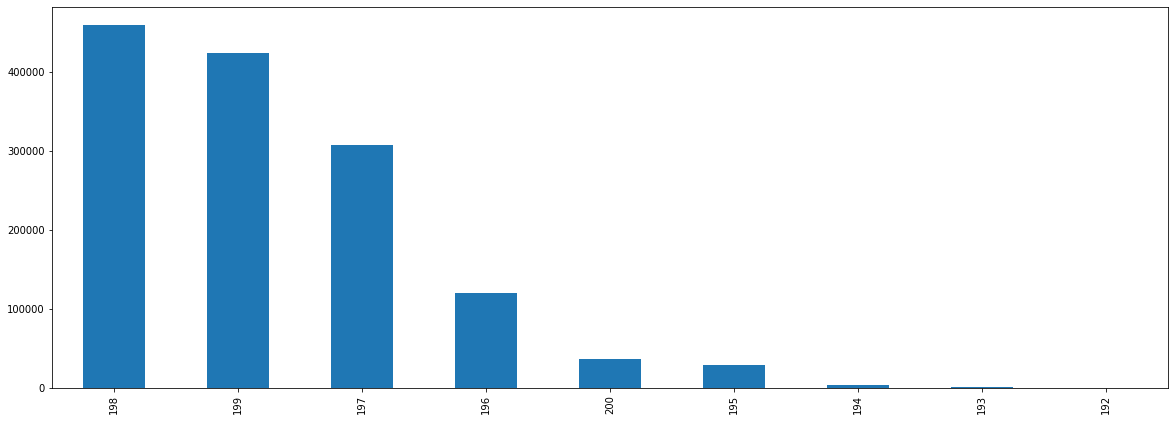

In [ ]:
# 연대별 분포도
year_df = user_df[user_df['birth_year'].isna() == False]['birth_year'].astype(str).apply(lambda x : x[:3])
plt.figure(figsize=(20, 7))
year_df.value_counts().plot.bar()

#### [gender] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('gender').count()), user_df['gender'].dtype)

2 float64


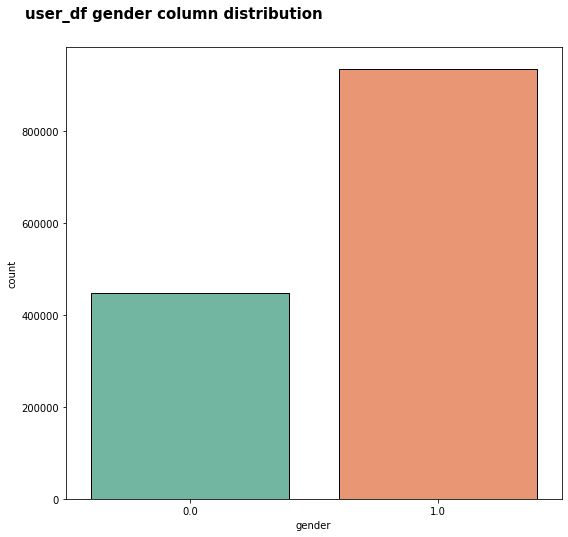

In [ ]:
# 성별 분포

fig, axes = plt.subplots(1,1, figsize=(8, 7), sharey=True)

sns.countplot(x='gender', data=user_df, palette="Set2", edgecolor='black')  
plt.suptitle('user_df gender column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [insert_time] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('insert_time').count()), user_df['insert_time'].dtype)

1265510 object


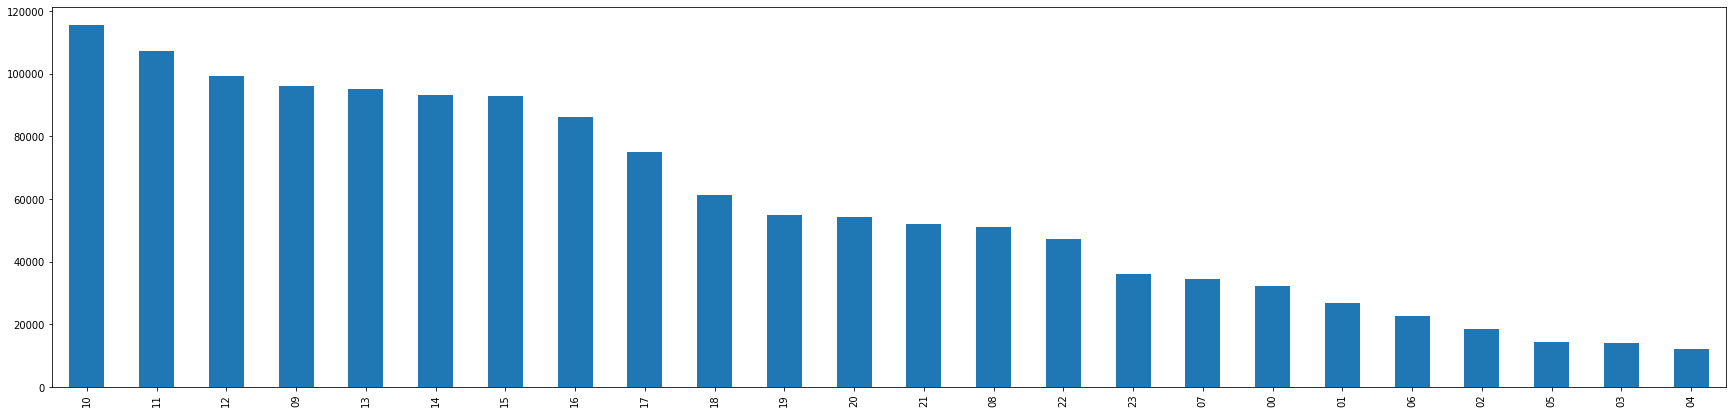

In [ ]:
# 시간별 데이터 분포도
time_df = user_df[user_df['insert_time'].isna() == False]['insert_time'].astype(str).apply(lambda x : x[11:13])
plt.figure(figsize=(30, 7))
time_df.value_counts().plot.bar()

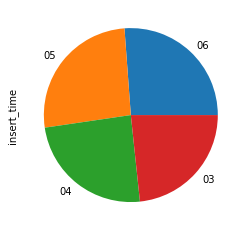

In [ ]:
# 월별 데이터 분포도
month_df = user_df[user_df['insert_time'].isna() == False]['insert_time'].astype(str).apply(lambda x : x[5:7])
month_df.value_counts().plot.pie()

#### [credit_score] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('credit_score').count()), user_df['credit_score'].dtype)

91 float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


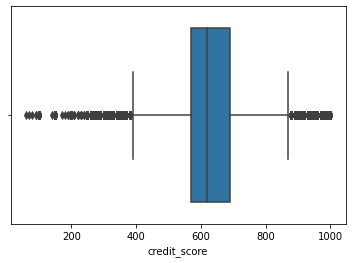

In [ ]:
# 이상치 확인
sns.boxplot(user_df['credit_score'])

#### [yearly_income] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('yearly_income').count()), user_df['yearly_income'].dtype)

696 float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


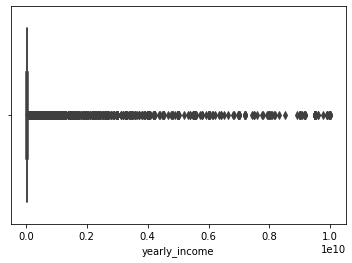

In [ ]:
# 이상치 확인
sns.boxplot(user_df['yearly_income'])

In [ ]:
# 그룹별 행 개수 확인
user_df.groupby('yearly_income').count()

,application_id,user_id,birth_year,gender,insert_time,credit_score,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
yearly_income,,,,,,,,,,,,,,,,
0.00000,17459,17459,16809,16809,17459,15367,17459,2520,17459,17459,17459,17459,12898,4946,12602,10713
1000000.00000,9045,9045,8853,8853,9045,7924,9045,2715,9045,9045,9045,9045,5158,1163,7197,6028
2000000.00000,11203,11203,11001,11001,11203,9967,11203,7717,11203,11203,11203,11203,6390,2114,8867,7549
3000000.00000,8245,8245,8107,8107,8245,7358,8245,5619,8245,8245,8245,8245,4655,1272,6729,5601
4000000.00000,2705,2705,2663,2663,2705,2386,2705,1760,2705,2705,2705,2705,1554,361,2216,1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600000000.00000,2,2,2,2,2,2,2,2,2,2,2,2,1,0,2,1
9768000000.00000,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
9900000000.00000,5,5,5,5,5,5,5,4,5,5,5,5,1,1,5,0


#### [income_type] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('income_type').count()), user_df['income_type'].dtype)

6 object


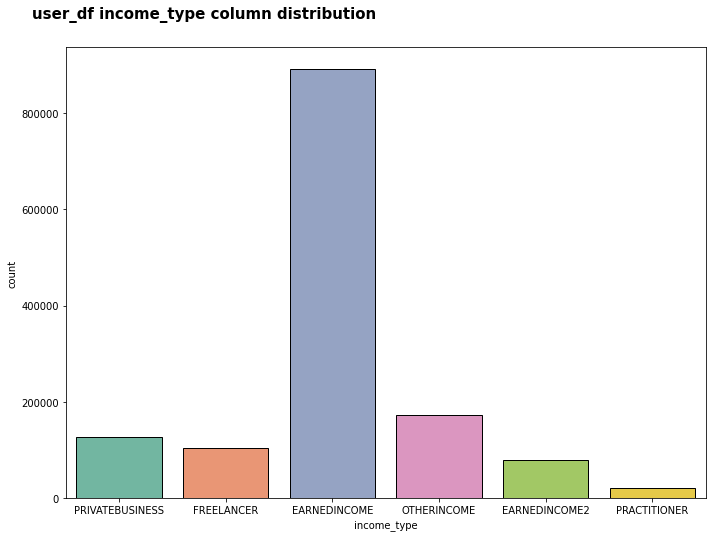

In [ ]:
# income_type 종류별 분포도

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='income_type', data=user_df, palette="Set2", edgecolor='black')  
plt.suptitle('user_df income_type column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [company_enter_month] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('company_enter_month').count()), user_df['company_enter_month'].dtype)

6719 float64


In [ ]:
# 데이터 형태 파악
user_df['company_enter_month']

0         20151101.00000
1         20070201.00000
2         20210901.00000
3         20170101.00000
4         20210901.00000
               ...      
1394211     202106.00000
1394212              NaN
1394213     200908.00000
1394214     201705.00000
1394215     201103.00000
Name: company_enter_month, Length: 1394216, dtype: float64

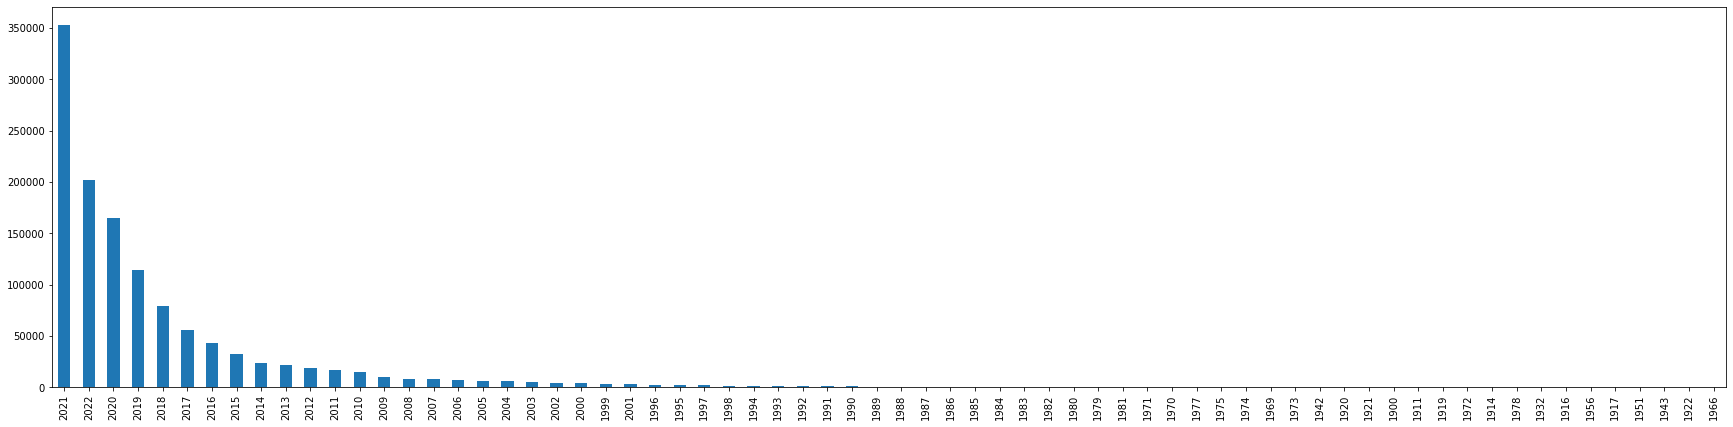

In [ ]:
# 연도별 분포도
day_df = user_df[user_df['company_enter_month'].isna() == False]['company_enter_month'].astype(str).apply(lambda x : x[:4])
plt.figure(figsize=(30, 7))
day_df.value_counts().plot.bar()

#### [employment_type] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('employment_type').count()), user_df['employment_type'].dtype)

4 object


In [ ]:
# employment_type 그룹별 데이터 개수
user_df.groupby('employment_type').count()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
employment_type,,,,,,,,,,,,,,,,
계약직,111445,111445,110605,110605,111445,103755,111445,111445,111298,111445,111445,111445,65009,18606,96361,86086
기타,345801,345801,341306,341306,345801,313171,345796,345801,175019,345801,345801,345801,207135,49775,285815,251840
일용직,18853,18853,18674,18674,18853,17809,18853,18853,18853,18853,18853,18853,10619,256,17244,15223
정규직,918032,918032,910587,910587,918032,854284,918032,918032,917286,918032,918032,918032,523992,122225,796171,727230


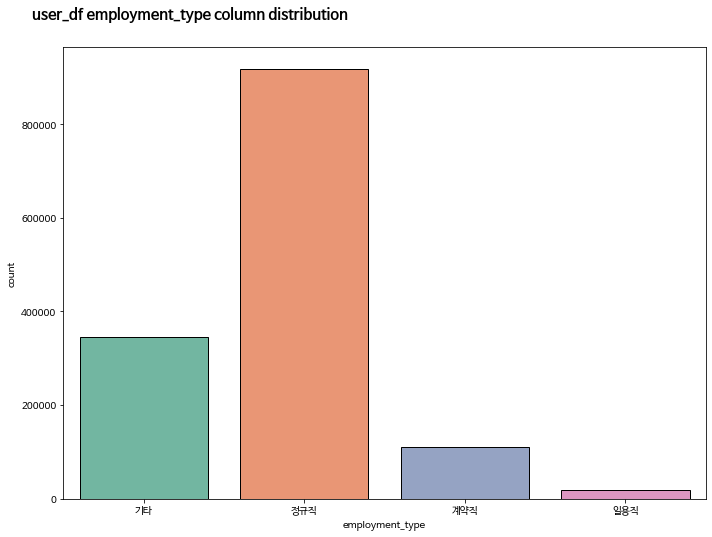

In [ ]:
# employment_type 종류별 분포도

fig, axes = plt.subplots(1,1,figsize=(10, 7), sharey=True)

sns.countplot(x='employment_type', data=user_df, palette="Set2", edgecolor='black')  
plt.suptitle('user_df employment_type column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [houseown_type] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('houseown_type').count()), user_df['houseown_type'].dtype)

4 object


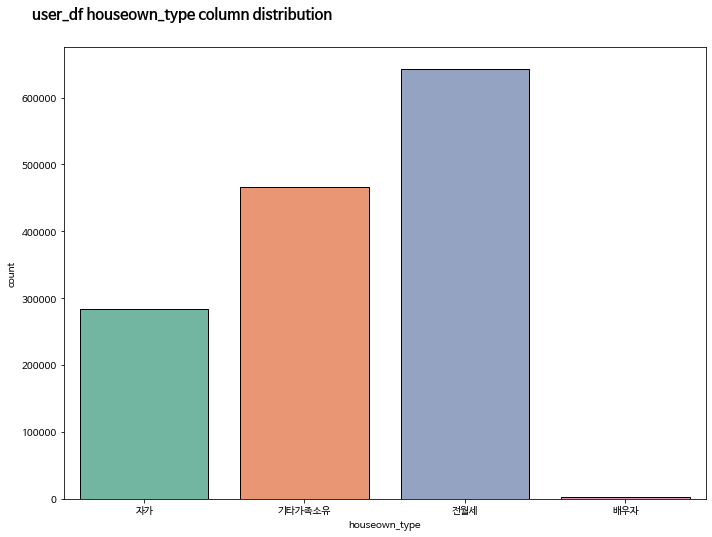

In [ ]:
# houseown_type 종류별 분포도

fig, axes = plt.subplots(1,1,figsize=(10, 7), sharey=True)

sns.countplot(x='houseown_type', data=user_df, palette="Set2", edgecolor='black')  
plt.suptitle('user_df houseown_type column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [desired_amount] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('desired_amount').count()), user_df['desired_amount'].dtype)

558 float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


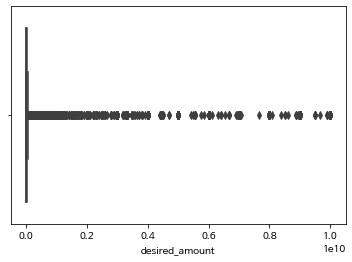

In [ ]:
# 이상치 확인
sns.boxplot(user_df['desired_amount'])

#### [purpose] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('purpose').count()), user_df['purpose'].dtype)

16 object


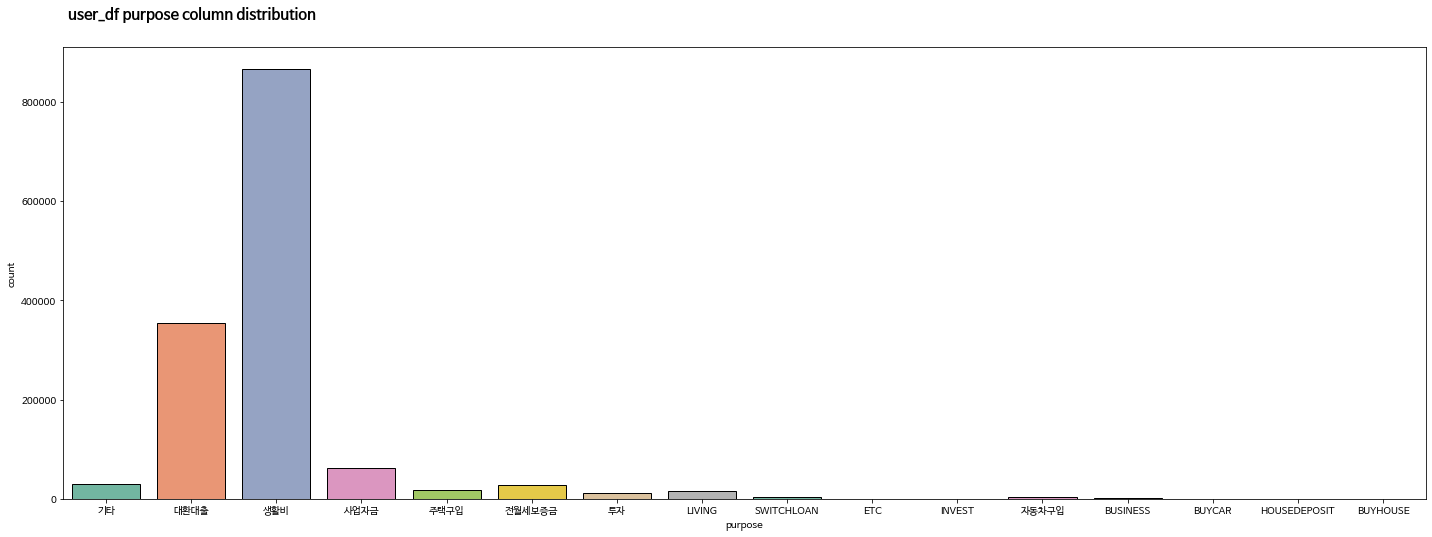

In [ ]:
# purpose 종류별 분포도

fig, axes = plt.subplots(1,1,figsize=(20, 7), sharey=True)

sns.countplot(x='purpose', data=user_df, palette="Set2", edgecolor='black')  
plt.suptitle('user_df purpose column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [personal_rehabilitation_yn] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('personal_rehabilitation_yn').count()), user_df['personal_rehabilitation_yn'].dtype)

2 float64


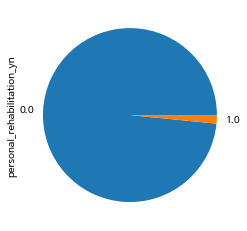

In [ ]:
# 데이터 분포도
user_df['personal_rehabilitation_yn'].value_counts().plot.pie()

#### [personal_rehabilitation_complete_yn] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('personal_rehabilitation_complete_yn').count()), user_df['personal_rehabilitation_complete_yn'].dtype)

2 float64


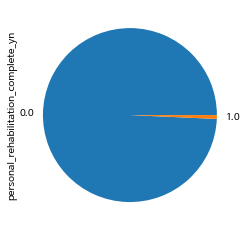

In [ ]:
# 데이터 분포도
user_df['personal_rehabilitation_complete_yn'].value_counts().plot.pie()

#### [existing_loan_cnt] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('existing_loan_cnt').count()), user_df['existing_loan_cnt'].dtype)

100 float64


In [ ]:
user_df.groupby('existing_loan_cnt').count()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_amt
existing_loan_cnt,,,,,,,,,,,,,,,,
1.00000,241604,241604,239597,239597,241604,235845,241580,241583,204833,241583,241583,241583,241583,150389,35826,126386
2.00000,145545,145545,144429,144429,145545,141701,145538,145538,127084,145538,145538,145538,145538,88405,21916,145545
3.00000,155934,155934,154844,154844,155934,152162,155923,155923,138161,155923,155923,155923,155923,92690,21430,155934
4.00000,144399,144399,143438,143438,144399,141170,144384,144384,128553,144384,144384,144384,144384,84665,18235,144399
5.00000,124048,124048,123308,123308,124048,121319,124044,124044,110911,124044,124044,124044,124044,72526,14304,124048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169.00000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
176.00000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
178.00000,32,32,32,32,32,32,32,32,32,32,32,32,32,9,9,32


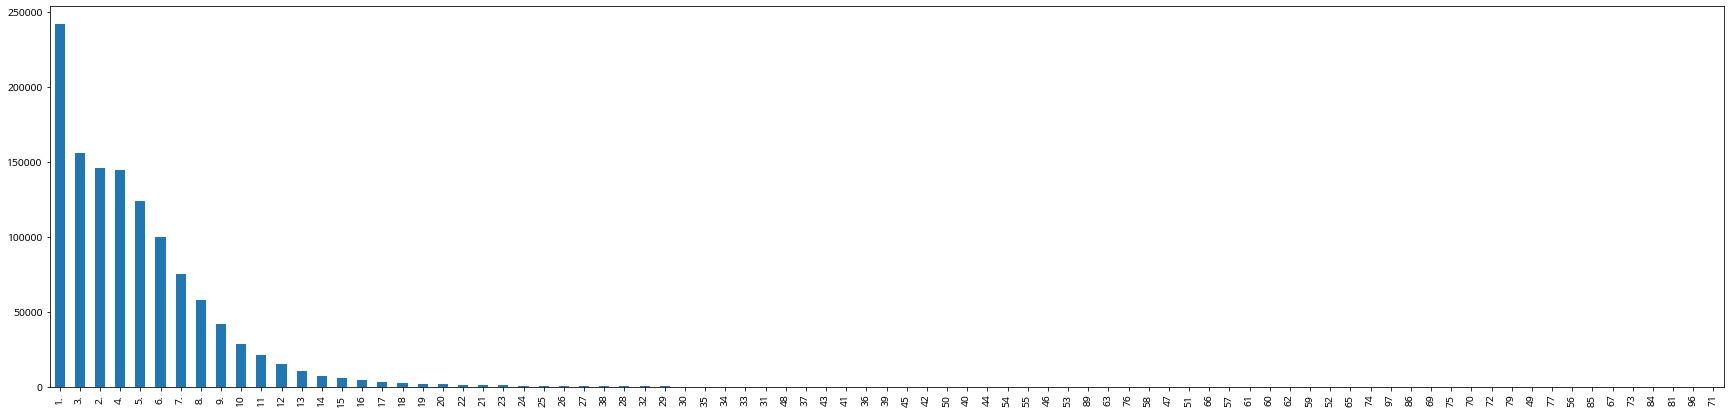

In [ ]:
# 10 단위로 끊어서 분포 파악
loan_10_df = user_df[user_df['existing_loan_cnt'].isna() == False]['existing_loan_cnt'].astype(str).apply(lambda x : x[:2])
plt.figure(figsize=(30, 7))
loan_10_df.value_counts().plot.bar()

#### [existing_loan_amt] EDA

In [ ]:
# 컬럼 그룹 개수 , type 출력
print(len(user_df.groupby('existing_loan_amt').count()), user_df['existing_loan_amt'].dtype)

1002 float64


In [ ]:
user_df.groupby('existing_loan_amt').count()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt
existing_loan_amt,,,,,,,,,,,,,,,,
0.00000,5130,5130,5082,5082,5130,4988,5130,5130,4113,5130,5130,5130,5130,3293,957,5130
1000000.00000,6893,6893,6802,6802,6893,6703,6891,6892,5166,6892,6892,6892,6892,4557,1204,6893
2000000.00000,8994,8994,8896,8896,8994,8756,8993,8993,6713,8993,8993,8993,8993,5694,1572,8994
3000000.00000,17702,17702,17470,17470,17702,17127,17699,17701,12501,17701,17701,17701,17701,11908,3968,17702
4000000.00000,9852,9852,9773,9773,9852,9595,9852,9852,7216,9852,9852,9852,9852,6296,1814,9852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164000000.00000,15,15,15,15,15,15,15,15,15,15,15,15,15,12,12,15
3273000000.00000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2
3345000000.00000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


#### 상관관계 파악

In [ ]:
user_df.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.00000,1.00000,2022-06-07 06:28:18,660.00000,108000000.00000,PRIVATEBUSINESS,20151101.00000,기타,자가,1000000.00000,기타,0.00000,NaN,4.00000,162000000.00000
1,954900,553686,1968.00000,1.00000,2022-06-07 14:29:03,870.00000,30000000.00000,PRIVATEBUSINESS,20070201.00000,정규직,기타가족소유,30000000.00000,대환대출,0.00000,NaN,1.00000,27000000.00000
2,137274,59516,1997.00000,1.00000,2022-06-07 21:40:22,710.00000,30000000.00000,FREELANCER,20210901.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,15000000.00000
3,1570936,167320,1989.00000,1.00000,2022-06-07 09:40:27,820.00000,62000000.00000,EARNEDINCOME,20170101.00000,정규직,자가,2000000.00000,생활비,0.00000,NaN,7.00000,344000000.00000
4,967833,33400,2000.00000,1.00000,2022-06-07 08:55:07,630.00000,36000000.00000,EARNEDINCOME,20210901.00000,정규직,기타가족소유,5000000.00000,생활비,0.00000,0.00000,1.00000,16000000.00000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


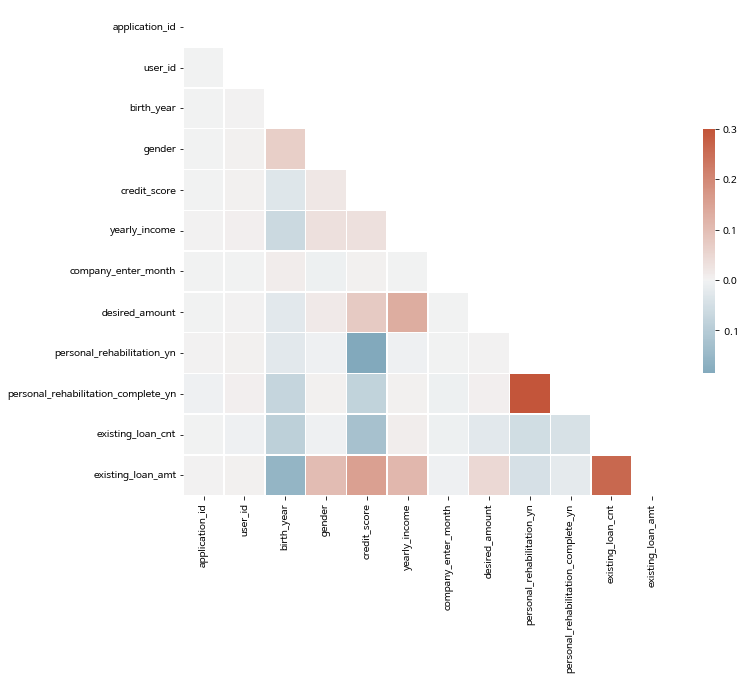

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(user_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(user_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.show()

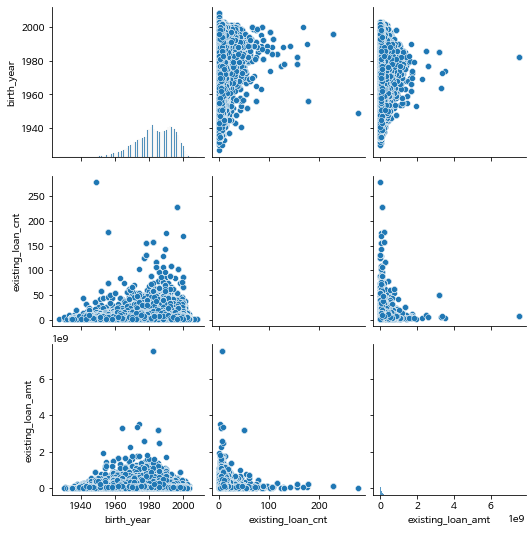

In [ ]:
# 관련있는 컬럼만 산점도로 확인
sns.pairplot(data=user_df[['birth_year','existing_loan_cnt','existing_loan_amt']])
plt.show()

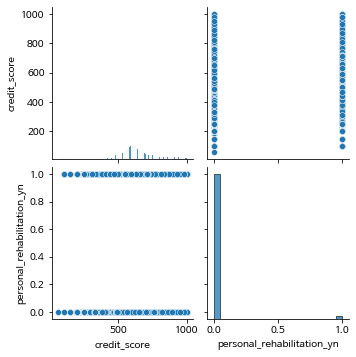

In [ ]:
# 관련있는 컬럼만 산점도로 확인
sns.pairplot(data=user_df[['credit_score','personal_rehabilitation_yn']])
plt.show()